# LightGBM
**핵심 파라미터**
<table border="1">
  <thead>
    <tr>
      <th>하이퍼파라미터</th>
      <th>설명</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><b>num_leaves</b></td>
      <td>한 트리에서 사용할 수 있는 리프의 최대 수를 지정한다. 모델의 복잡도를 결정하며, 값을 크게 하면 과적합(overfitting) 가능성이 높아진다.</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>트리의 최대 깊이를 제한한다. <code>num_leaves</code>와 함께 과적합을 방지하기 위해 조정된다.</td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>각 단계에서 트리의 기여도를 조정하는 학습률이다. 작은 값을 설정하면 모델 학습이 느리지만 성능이 더 좋을 수 있다.</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>생성할 트리의 수를 지정한다. 보통 <code>learning_rate</code>가 작을수록 큰 값을 설정한다.</td>
    </tr>
    <tr>
      <td><b>min_data_in_leaf</b></td>
      <td>리프 노드에서 최소 데이터 수를 제한하여 과적합을 방지한다.</td>
    </tr>
    <tr>
      <td><b>feature_fraction</b></td>
      <td>각 트리를 학습할 때 사용할 피처의 비율을 지정한다. 이 값을 줄이면 피처 샘플링 효과를 얻을 수 있다.</td>
    </tr>
    <tr>
      <td><b>bagging_fraction & bagging_freq</b></td>
      <td>데이터 샘플링을 통한 앙상블 효과를 얻기 위한 옵션으로, 일부 데이터만을 사용해 트리를 학습한다.</td>
    </tr>
    <tr>
      <td><b>lambda_l1 & lambda_l2</b></td>
      <td>L1 및 L2 정규화 항을 추가하여 모델의 가중치를 제한한다.</td>
    </tr>
    <tr>
      <td><b>boosting</b></td>
      <td>Boosting의 종류를 지정할 수 있다. 일반적으로 <code>gbdt</code>(Gradient Boosting Decision Tree)를 사용하지만, <code>dart</code>(Dropouts meet Multiple Additive Regression Trees)나 <code>goss</code>(Gradient-based One-Side Sampling)도 선택할 수 있다.</td>
    </tr>
  </tbody>
</table>

In [2]:
#%pip install lightgbm

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

data = load_breast_cancer()

# 학습-테스트 분리
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
# 학습데이터 -> 학습-검증 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

eval_set = [(X_tr,y_tr), (X_val, y_val)]

# Define model
lgb_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate= 0.7,
    random_state=0,
    early_stopping_rounds=100, # HistGradientBoostingClassifier의 'early_stopping'이랑 같음 => 성능이 '일정' 이상 향상되지 않으면 조기종료
    verbose=1
)

lgb_clf.fit(X_tr, y_tr, eval_set=eval_set)
# 결과 보면 5번째에서 학습 중단 (젤 성능 좋아서)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5]	training's binary_logloss: 0.0362993	valid_1's binary_logloss: 0.139951


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.7
,n_estimators,400
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [8]:
lgb_clf.score(X_train, y_train), lgb_clf.score(X_test, y_test)

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(0.9929577464788732, 0.951048951048951)

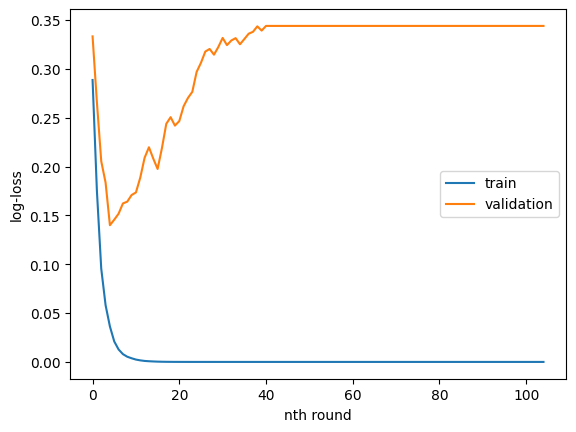

In [7]:
# 학습 곡선 그려보기
import matplotlib.pyplot as plt
import seaborn as sns

# verbose는 출력, evals_result()는 반환
result = lgb_clf.evals_result_


train_loss = result['training']['binary_logloss']
val_loss = result['valid_1']['binary_logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('log-loss')
plt.show()
